              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
...           ...
2001-12-01  370.3
2001-12-08  370.8
2001-12-15  371.2
2001-12-22  371.3
2001-12-29  371.5

[2284 rows x 1 columns]


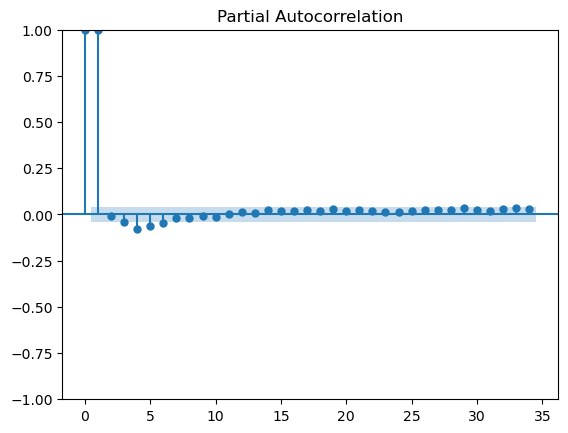

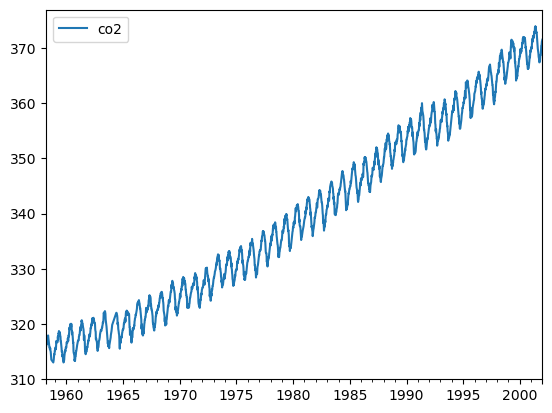

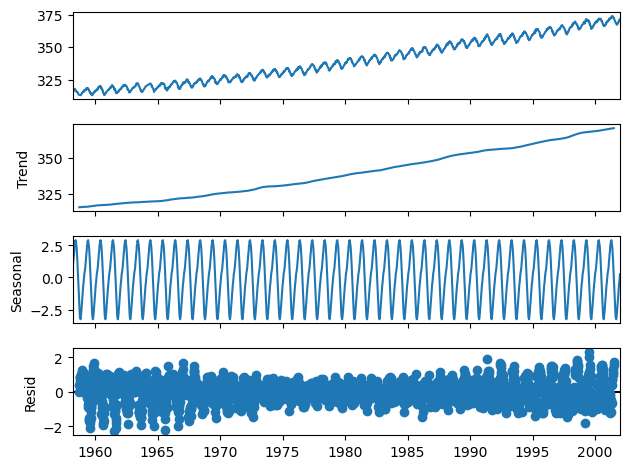

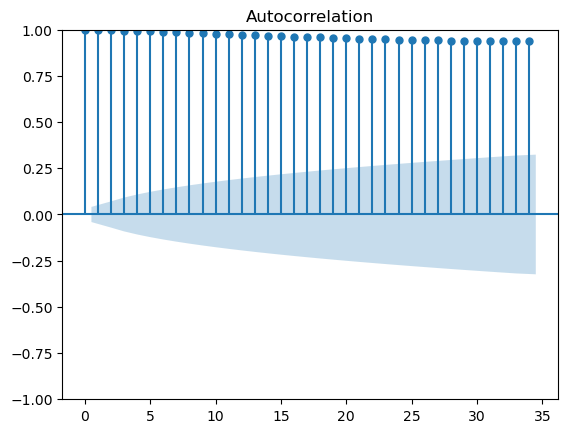

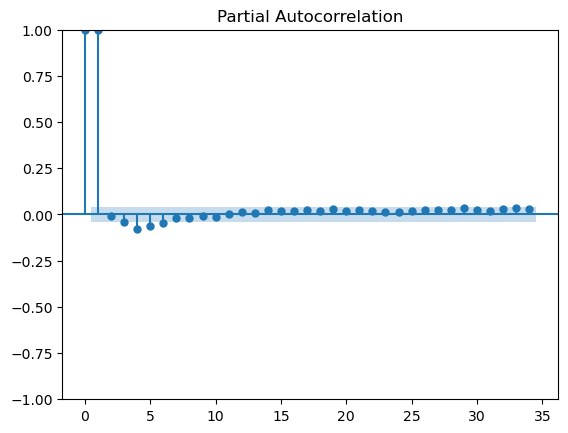

In [1]:

# A time series is a sequence of data points that occur in successive order over some period of time. 

# The first specificity of time series is that the timestamp that identifies the data has intrinsic meaning. 
# Univariate time series models are forecasting models that use only one variable (the target variable) and 
# its temporal variation to forecast the future. Univariate models are specific to time series.

# In other situations, you may have additional explanatory data about the future. For example, imagine that 
# you want to factor the weather forecast into your product demand forecast, or that you have some other 
# data that will influence your predictions. In this case, you can use Multivariate time series models. 
# Multivariate Time Series models are the Univariate Time Series models that are adapted to integrate 
# external variables. 

import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


import statsmodels.datasets.co2 as co2
co2_data = co2.load().data
print(co2_data)

co2_data = co2_data.fillna(co2_data.interpolate())
co2_data.plot()

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(co2_data)
result.plot()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(co2_data)

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(co2_data)


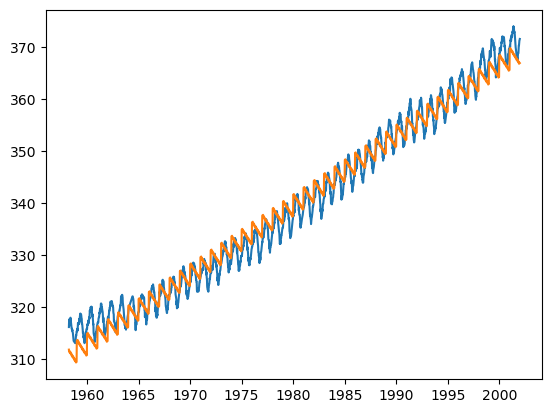

In [2]:

import numpy as np

# extract the seasonality data
months = [x.month for x in co2_data.index]
years = [x.year for x in co2_data.index]
day = [x.day for x in co2_data.index]

# convert into one matrix
X = np.array([day, months, years]).T


# Here is an example of a very simple model.
from sklearn.linear_model import LinearRegression

# fit the model
my_lr = LinearRegression()
my_lr.fit(X, co2_data.co2.values)

# predict on the same period
preds = my_lr.predict(X)

# plot what has been learned
plt.plot(co2_data.index, co2_data.co2.values)
plt.plot(co2_data.index, preds)


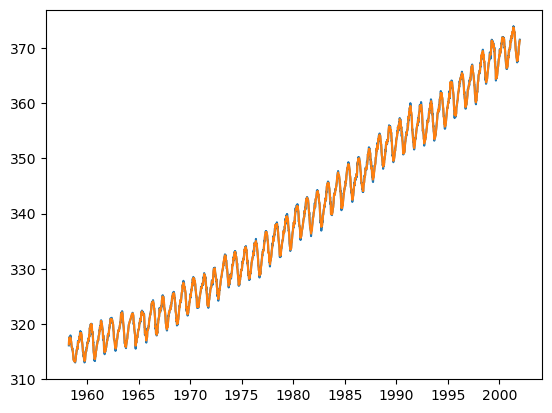

In [3]:

# Here is an example of a more robust model (Bagging Model).
from sklearn.ensemble import RandomForestRegressor

# fit the model
my_rf = RandomForestRegressor()
my_rf.fit(X, co2_data.co2.values)

# predict on the same period
preds = my_rf.predict(X)

# plot what has been learned
plt.plot(co2_data.index, co2_data.co2.values)
plt.plot(co2_data.index, preds)


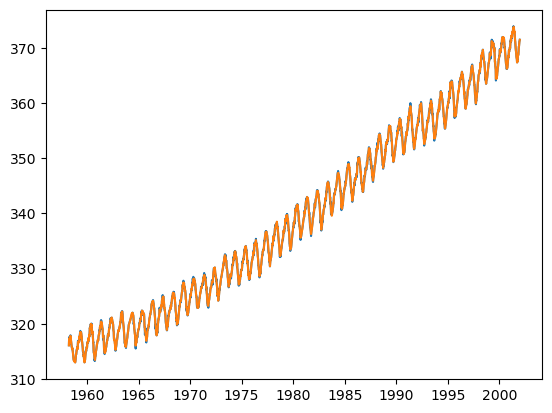

In [4]:

# Here is an example of an even more sophisticated model (Boosting Model).
import xgboost as xgb

# fit the model
my_xgb = xgb.XGBRegressor()
my_xgb.fit(X, co2_data.co2.values)

# predict on the same period
preds = my_xgb.predict(X)

# plot what has been learned
plt.plot(co2_data.index, co2_data.co2.values)
plt.plot(co2_data.index, preds)


In [6]:

# Let's move on to another form of time series analysis...

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_excel("C:\\Users\\Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

furniture['Order Date'].min(), furniture['Order Date'].max()

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

furniture.isnull().sum()


Order Date    0
Sales         0
dtype: int64

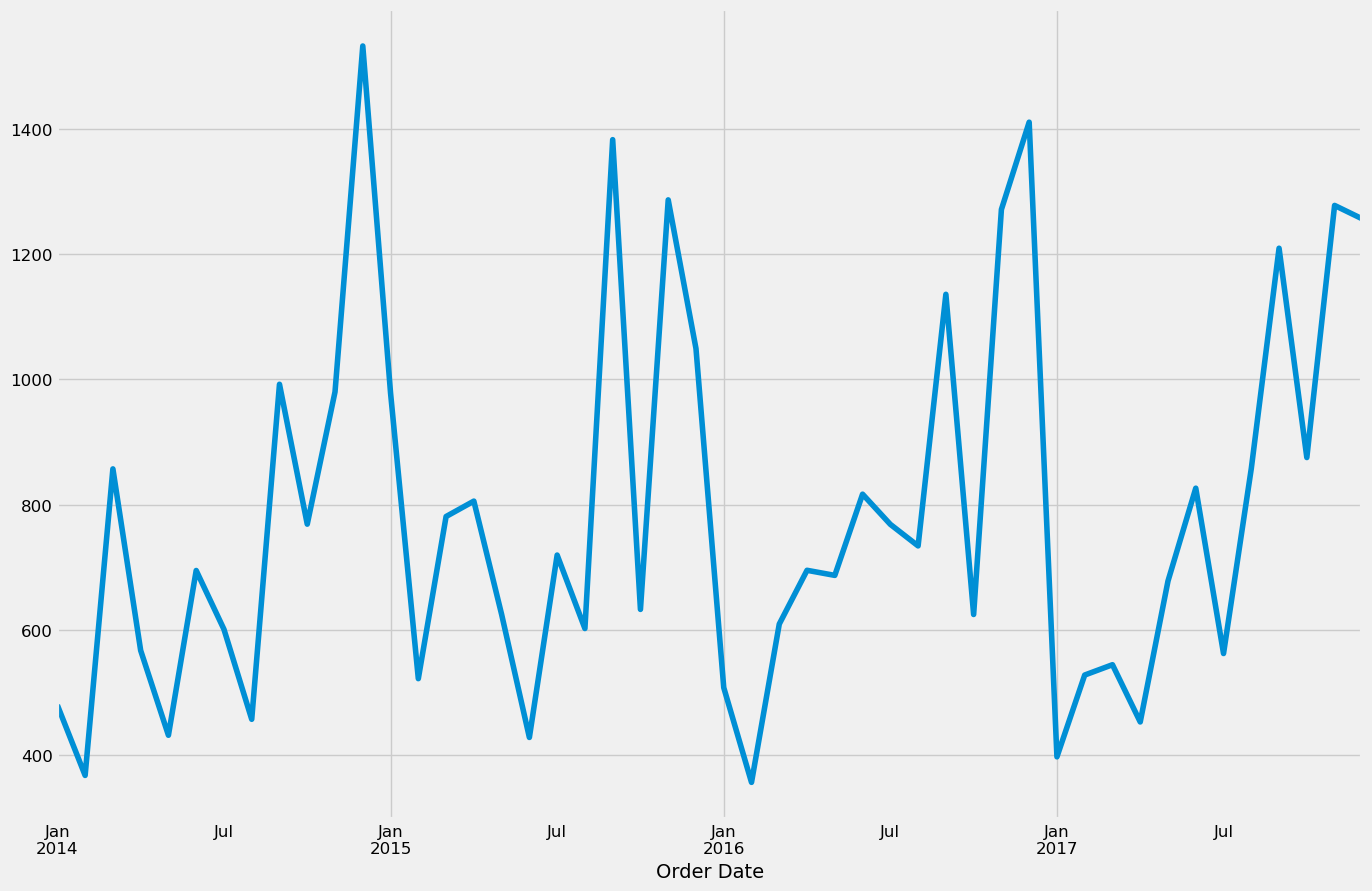

In [28]:

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

furniture = furniture.set_index('Order Date')
furniture.index

y = furniture['Sales'].resample('MS').mean()
y.plot(figsize=(15, 10))
plt.show()


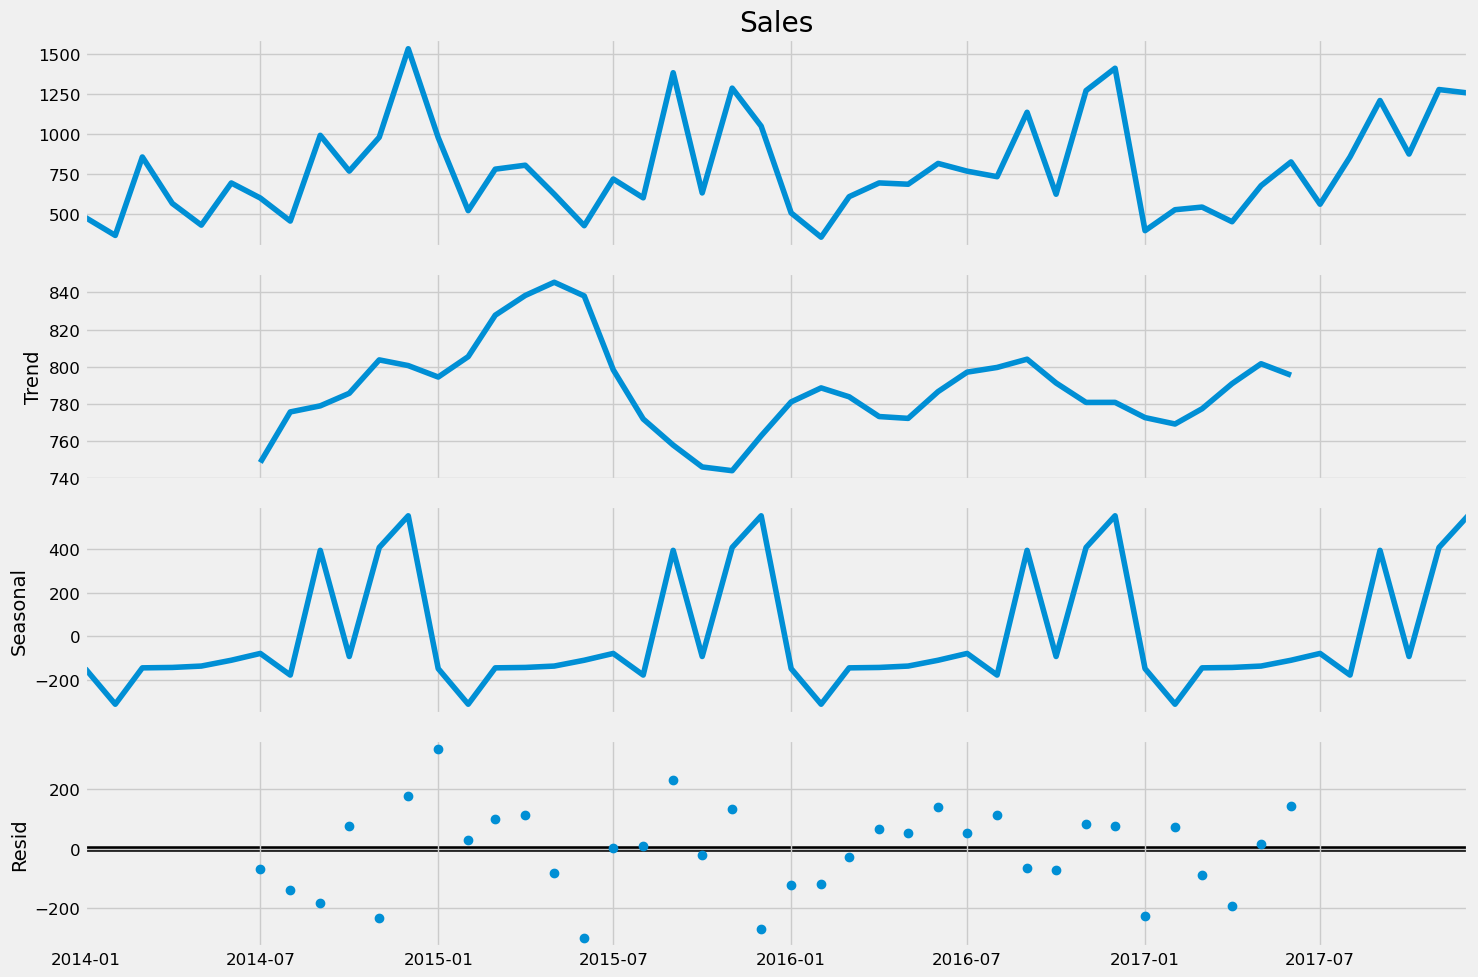

In [27]:

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


In [18]:

# Seasonality in a time series is a regular pattern of changes that repeats over 'N' time periods, where 'N' defines 
# the 'number' of time periods until the pattern repeats again.

# For example, there is seasonality in monthly data for which high values tend always to occur in some 
# particular months and low values tend always to occur in other particular months. 
# In this case, S = 12 (months per year) is the span of the periodic seasonal behavior. 
# For quarterly data, S = 4 time periods per year.

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


# Fit the ARIM Model
mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1),
                            seasonal_order=(1, 1, 0, 12),
                            enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1457.5412534942598
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997935736
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1179.6903776415356
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803033336
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2621.5327370301484
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091517
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732915
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5634719720483
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2556.28914808803
ARIMA(0, 0, 1)x(1, 1, 0, 12

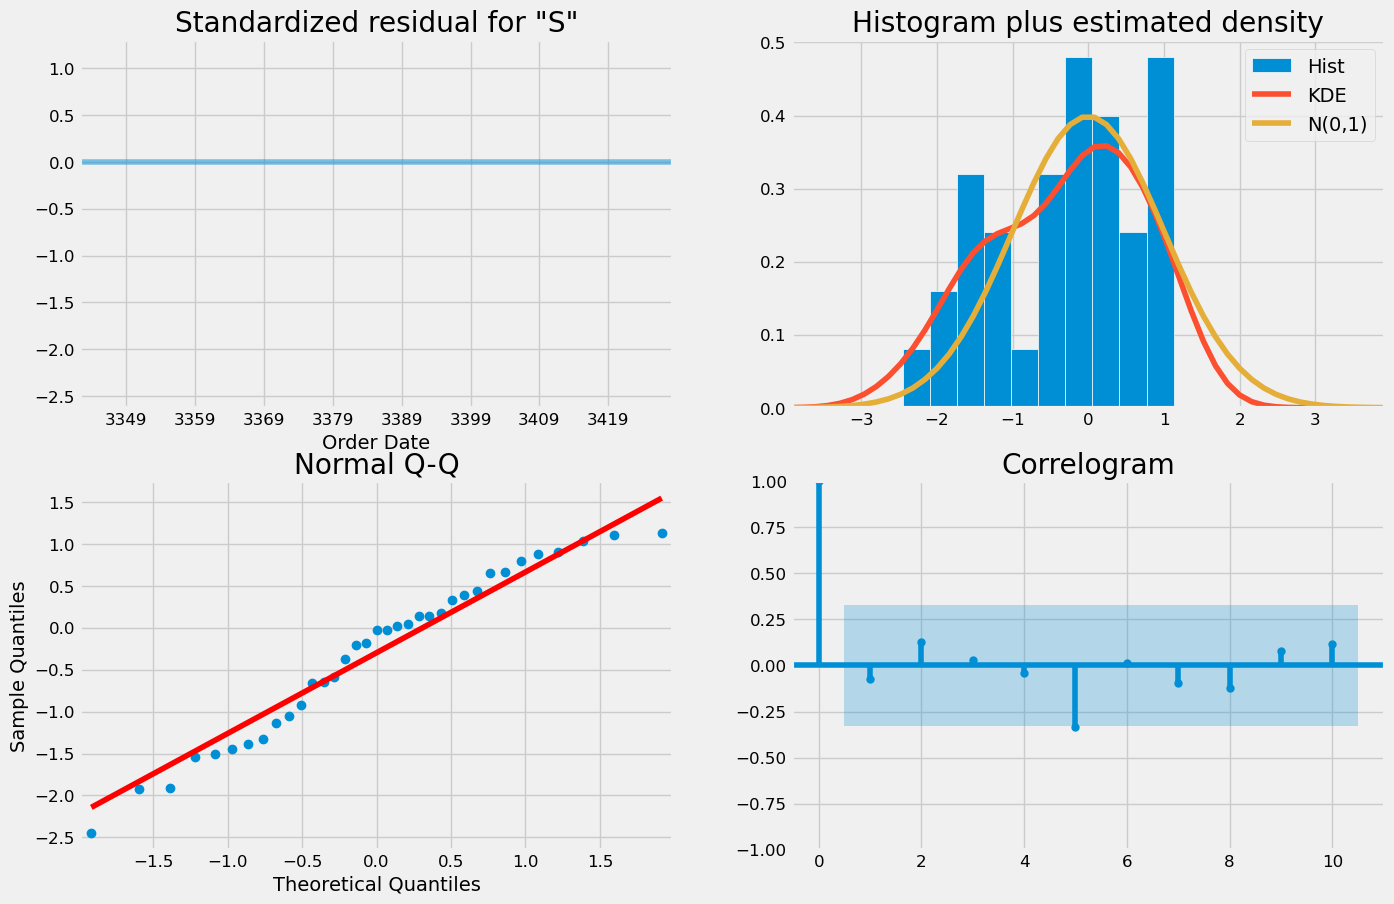

In [25]:

results.plot_diagnostics(figsize=(15, 10))
plt.show()


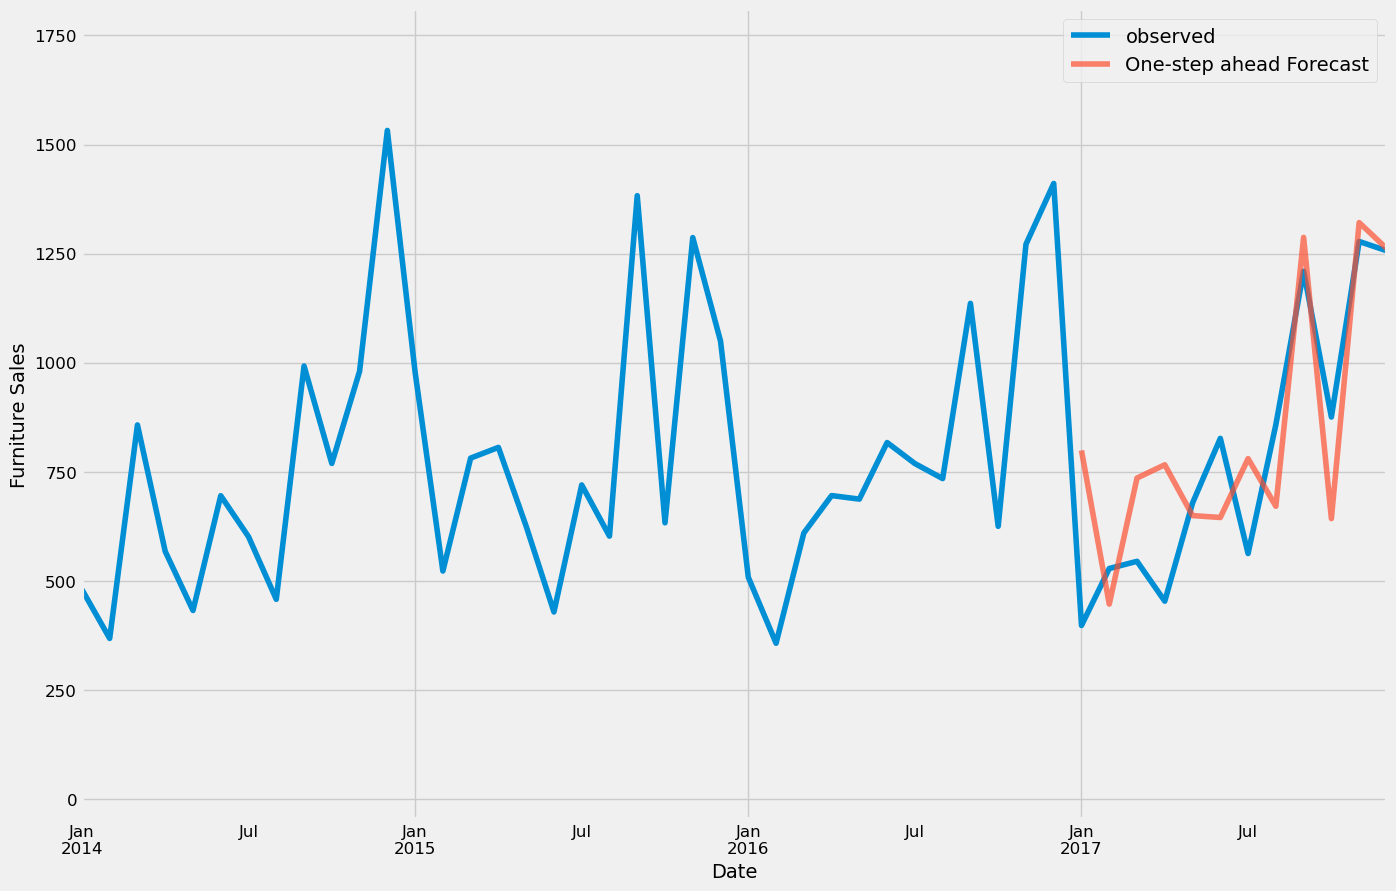

In [30]:

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(15, 10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


The Mean Squared Error of our forecasts is 39996.01
The Root Mean Squared Error of our forecasts is 199.99


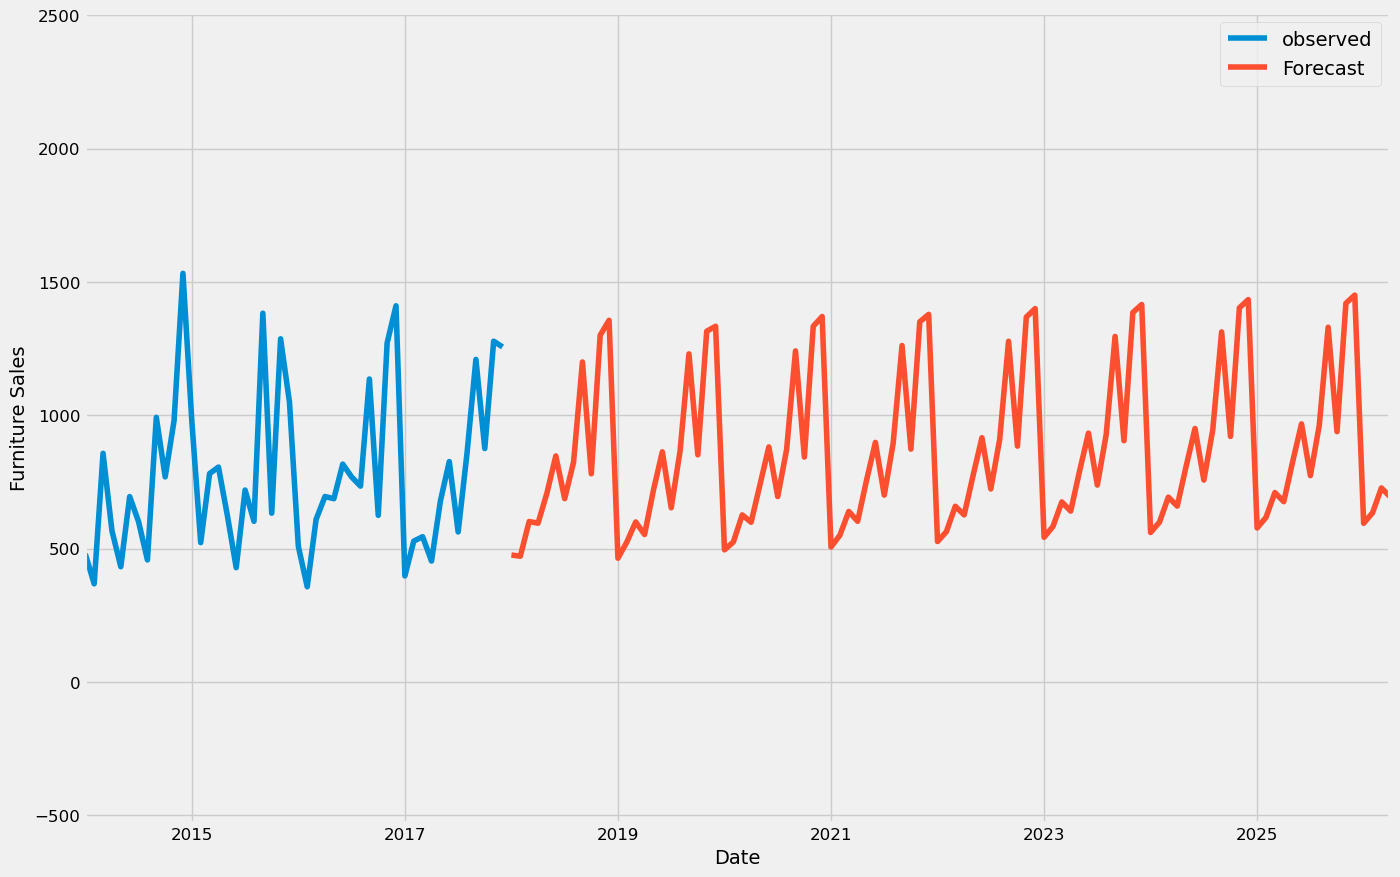

In [32]:

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# The Mean Squared Error of our forecasts is 22993.58
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

# Result:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(15, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [33]:

furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape


cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()


,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


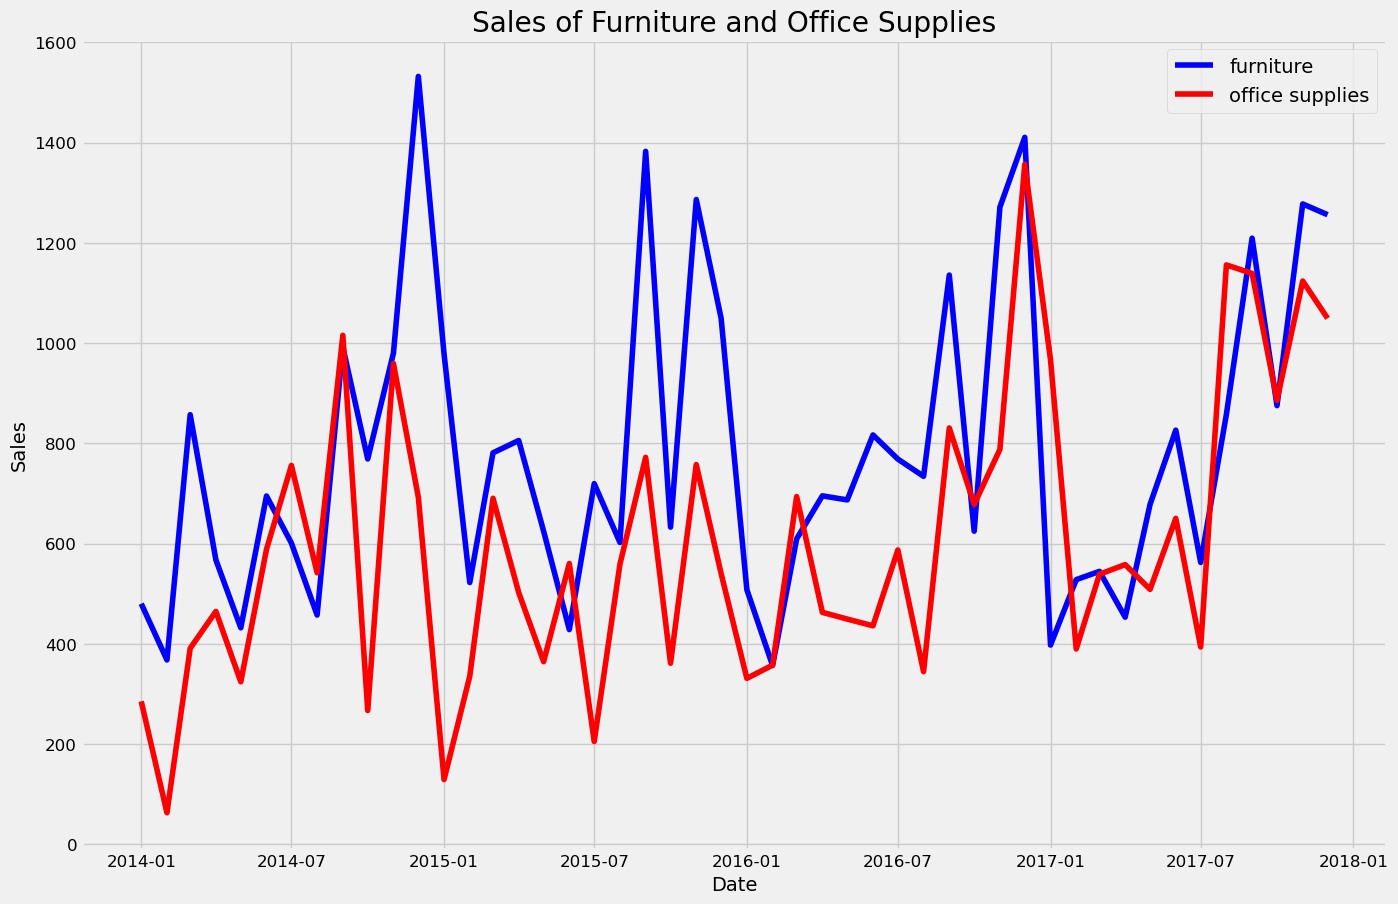

In [35]:

plt.figure(figsize=(15, 10))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();


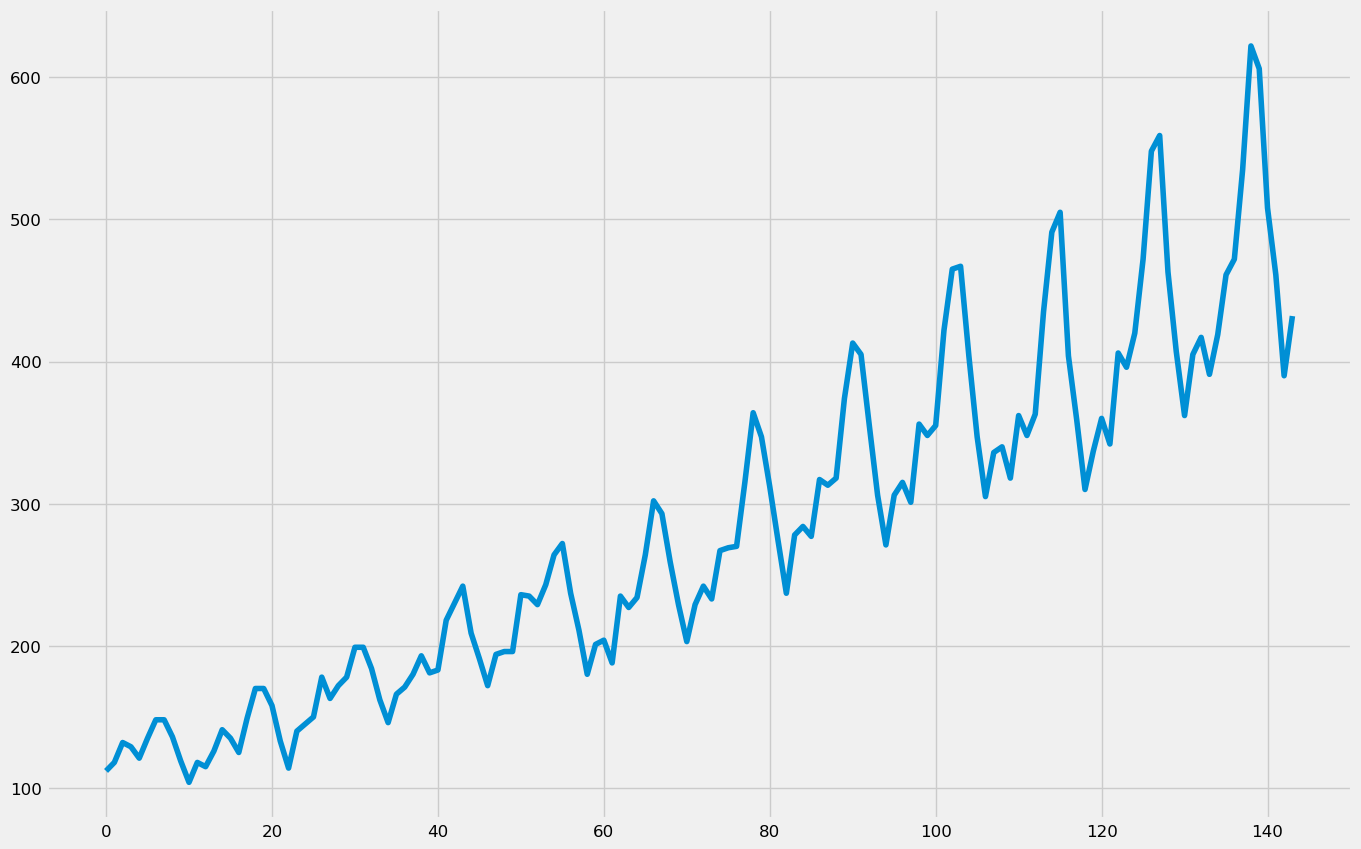

Epoch: 0, loss: 0.35131
Epoch: 100, loss: 0.00556
Epoch: 200, loss: 0.00275
Epoch: 300, loss: 0.00248
Epoch: 400, loss: 0.00223
Epoch: 500, loss: 0.00204
Epoch: 600, loss: 0.00191
Epoch: 700, loss: 0.00182
Epoch: 800, loss: 0.00177
Epoch: 900, loss: 0.00176
Epoch: 1000, loss: 0.00175
Epoch: 1100, loss: 0.00175
Epoch: 1200, loss: 0.00175
Epoch: 1300, loss: 0.00174
Epoch: 1400, loss: 0.00174
Epoch: 1500, loss: 0.00174
Epoch: 1600, loss: 0.00173
Epoch: 1700, loss: 0.00173
Epoch: 1800, loss: 0.00173
Epoch: 1900, loss: 0.00172


In [43]:

# Time Series Forecasting with Deep Learning in PyTorch
# Time series forecasting plays a crucial role in various domains, such as finance, weather forecasting, 
# sales prediction, and demand forecasting. PyTorch-Forecasting is an open-source Python package built on 
# top of PyTorch, designed specifically to simplify and enhance the process of time series forecasting.

# PyTorch-Forecasting is a powerful package that simplifies time series forecasting with its intuitive 
# interface and extensive set of functionalities. By leveraging PyTorch’s deep learning capabilities, 
# it enables users to build accurate and efficient models for predicting future values in time series data. 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

training_set = pd.read_csv('C:\\Users\\airline-passengers.csv')
#training_set = pd.read_csv('shampoo.csv')

training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Shampoo Sales Data')
plt.show()


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))


class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out
    
    
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))


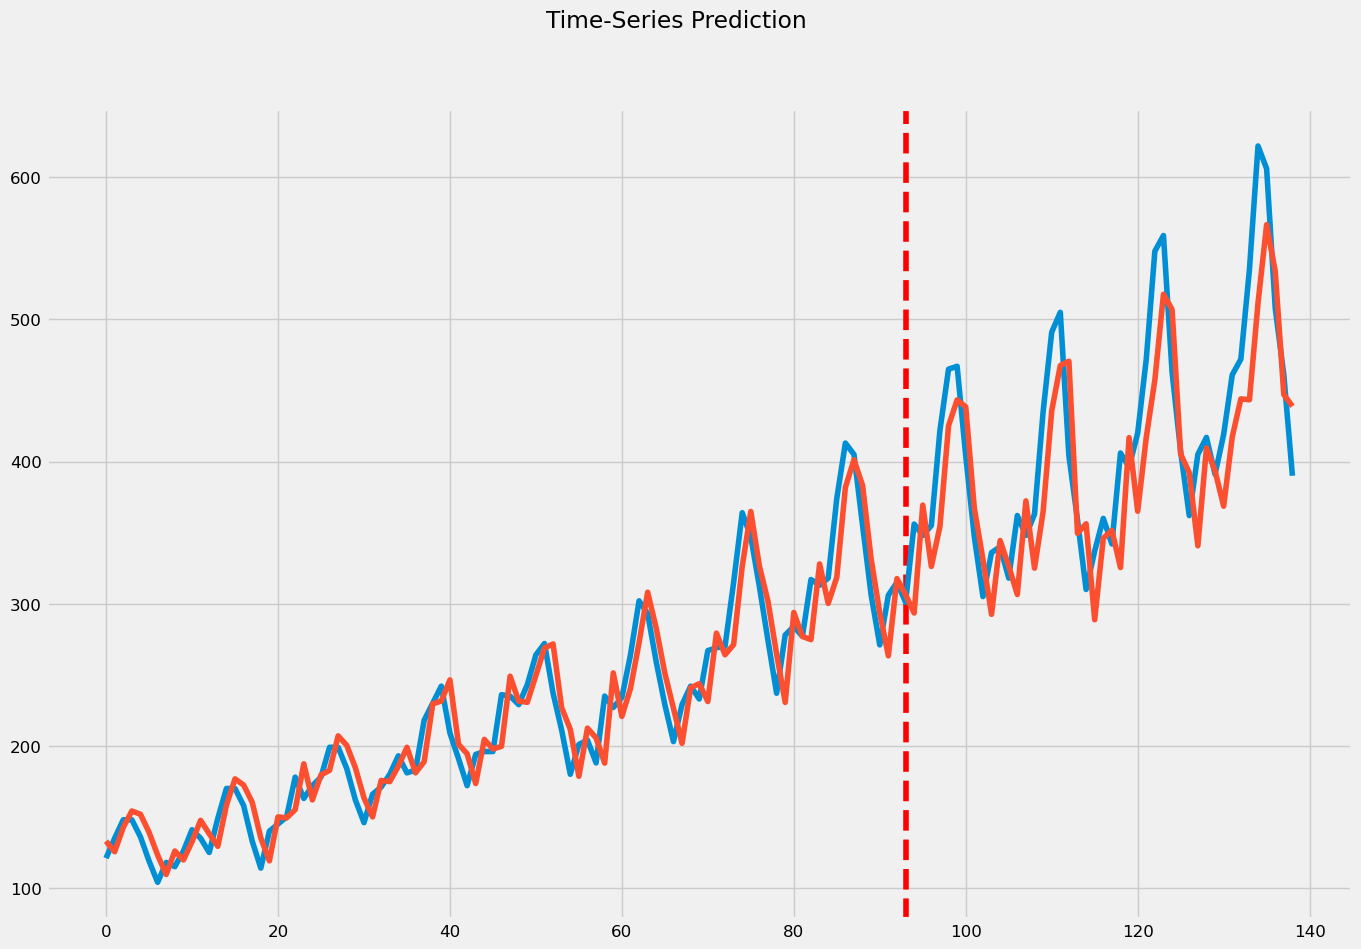

In [44]:

lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()
